In [1]:
import numpy as np
import pandas as pd
import json


In [104]:
df = pd.read_csv('Assign_16.csv')
# list(df['region_shape_attributes'])
df

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,img_001.jpg,5810,{},1,0,"{""name"":""rect"",""x"":93,""y"":36,""width"":63,""heigh...","{""Faces"":""Top""}"
1,img_002.jpg,8162,{},1,0,"{""name"":""rect"",""x"":99,""y"":16,""width"":88,""heigh...","{""Faces"":""DownLeft""}"
2,img_003.jpg,6031,{},1,0,"{""name"":""rect"",""x"":96,""y"":6,""width"":89,""height...","{""Faces"":""Front""}"
3,img_004.jpg,5913,{},1,0,"{""name"":""rect"",""x"":113,""y"":7,""width"":95,""heigh...","{""Faces"":""Front""}"
4,img_005.jpg,13634,{},2,0,"{""name"":""rect"",""x"":72,""y"":24,""width"":65,""heigh...","{""Faces"":""Front""}"
...,...,...,...,...,...,...,...
115,img_097.jpg,6871,{},2,0,"{""name"":""rect"",""x"":137,""y"":0,""width"":112,""heig...","{""Faces"":""UpLeft""}"
116,img_097.jpg,6871,{},2,1,"{""name"":""rect"",""x"":33,""y"":10,""width"":105,""heig...","{""Faces"":""UpLeft""}"
117,img_098.jpg,63229,{},1,0,"{""name"":""rect"",""x"":340,""y"":27,""width"":298,""hei...","{""Faces"":""Front""}"
118,img_099.jpg,227511,{},1,0,"{""name"":""rect"",""x"":173,""y"":92,""width"":634,""hei...","{""Faces"":""Front""}"


In [ ]:
data = list(df['region_shape_attributes'])

In [88]:
x = []
y = []
width = []
height = []
data = list(df['region_shape_attributes'])
for i in data:
    i = json.loads(i)
    v = list(i.values())
    print(v)
    
    x.append(v[1])
    y.append(v[2])
    width.append(v[3])
    height.append(v[4])


['rect', 93, 36, 63, 68]
['rect', 99, 16, 88, 63]
['rect', 96, 6, 89, 87]
['rect', 113, 7, 95, 112]
['rect', 72, 24, 65, 78]
['rect', 155, 1, 90, 81]
['rect', 30, 7, 57, 47]
['rect', 130, -1, 46, 44]
['rect', 220, 3, 64, 63]
['rect', 95, 3, 100, 109]
['rect', 32, 73, 91, 64]
['rect', 102, 1, 112, 117]
['rect', 102, 2, 76, 93]
['rect', 154, 12, 123, 120]
['rect', 10, 12, 105, 138]
['rect', 133, 15, 117, 146]
['rect', 59, 4, 177, 159]
['rect', 59, 1, 103, 81]
['rect', 42, 25, 102, 126]
['rect', 38, 17, 108, 133]
['rect', 63, 15, 82, 106]
['rect', 133, 0, 135, 148]
['rect', 11, 9, 124, 125]
['rect', 182, 1, 114, 126]
['rect', 19, 39, 69, 108]
['rect', 87, 25, 84, 117]
['rect', 90, 9, 107, 127]
['rect', 62, 2, 95, 115]
['rect', 52, 17, 112, 140]
['rect', 151, -1, 83, 134]
['rect', 159, 54, 21, 30]
['rect', 33, 11, 116, 142]
['rect', 43, 8, 54, 68]
['rect', 98, 13, 46, 70]
['rect', 25, 5, 121, 156]
['rect', 88, 0, 81, 105]
['rect', 76, 37, 73, 80]
['rect', 152, 46, 63, 85]
['rect', 29, 23, 

In [92]:
dim = pd.DataFrame()

dim['x'] = x
dim['y'] = y
dim['width'] = width
dim['height'] = height

In [93]:
dim

,x,y,width,height
0,93,36,63,68
1,99,16,88,63
2,96,6,89,87
3,113,7,95,112
4,72,24,65,78
...,...,...,...,...
115,137,0,112,138
116,33,10,105,144
117,340,27,298,386
118,173,92,634,856


In [98]:
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
dim_scale = pd.DataFrame(scale.fit_transform(dim),columns=['X','Y','Width','Height'])


In [99]:
dim_scale

,X,Y,Width,Height
0,-0.093926,0.583093,-0.646381,-0.638828
1,-0.031540,-0.162868,-0.373838,-0.678888
2,-0.062733,-0.535849,-0.362936,-0.486599
3,0.114028,-0.498551,-0.297526,-0.286297
4,-0.312278,0.135516,-0.624577,-0.558707
...,...,...,...,...
115,0.363573,-0.759637,-0.112197,-0.077984
116,-0.717788,-0.386657,-0.188509,-0.029912
117,2.474307,0.247410,1.915522,1.909006
118,0.737890,2.671784,5.578497,5.674672


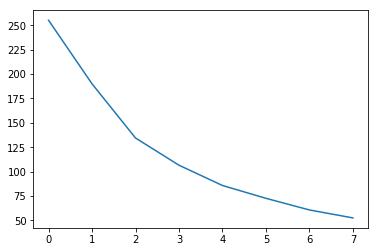

In [101]:
from sklearn.cluster import KMeans
loss = []
for i in range(2,10):
    K = KMeans(i, random_state=1)
    labels = K.fit(dim_scale)
    loss.append(labels.inertia_)

plt.plot(loss)

In [118]:
from sklearn.cluster import KMeans
K = KMeans(4, random_state=0)
K.fit(dim_scale)
labels

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [119]:
k_labels = K.predict(dim_scale)

In [120]:
k_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 0, 0, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 0, 2, 1])

In [121]:
dim_scale['cluster'] = k_labels

In [122]:
dim_scale

,X,Y,Width,Height,cluster
0,-0.093926,0.583093,-0.646381,-0.638828,1
1,-0.031540,-0.162868,-0.373838,-0.678888,1
2,-0.062733,-0.535849,-0.362936,-0.486599,1
3,0.114028,-0.498551,-0.297526,-0.286297,1
4,-0.312278,0.135516,-0.624577,-0.558707,1
...,...,...,...,...,...
115,0.363573,-0.759637,-0.112197,-0.077984,1
116,-0.717788,-0.386657,-0.188509,-0.029912,1
117,2.474307,0.247410,1.915522,1.909006,0
118,0.737890,2.671784,5.578497,5.674672,2


In [124]:
from mpl_toolkits.mplot3d import Axes3D

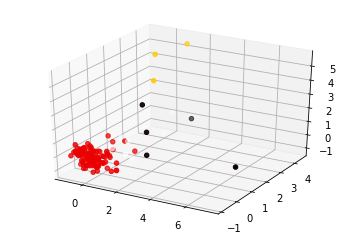

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = dim_scale['X']
y = dim_scale["Y"]
z = dim_scale['Width']
v = dim_scale['Height']

img = ax.scatter(x, y, z, c=dim_scale['cluster'])
plt.show()

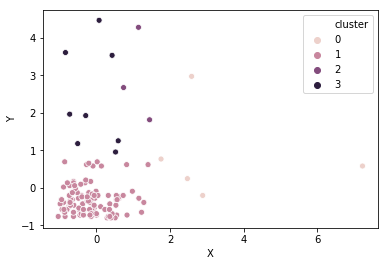

In [134]:
import seaborn as sns
sns.scatterplot(x,y,hue=dim_scale['cluster'])

In [135]:
dim

,x,y,width,height
0,93,36,63,68
1,99,16,88,63
2,96,6,89,87
3,113,7,95,112
4,72,24,65,78
...,...,...,...,...
115,137,0,112,138
116,33,10,105,144
117,340,27,298,386
118,173,92,634,856


In [136]:
x1 = x + width 
y1 = y + height

In [138]:
Xc = x +((x1-x)/2)
Yc = y +((y1-y)/2)

In [139]:
Xc

0       31.406074
1       43.968460
2       44.437267
3       47.614028
4       32.187722
          ...    
115     56.363573
116     51.782212
117    151.474307
118    317.737890
119     64.615849
Name: X, Length: 120, dtype: float64